# Unnormalized log transformed: breast, prostate, thyroid

The unnormalized and log transformed breast, prostate and thyroid

In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [15]:
rnaNet = ResNet()

# GTEX as source and TCGA as target
source_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [16]:
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))


gtex = source shape = (211, 20)
tcga = target shape = (636, 20)


In [17]:
rnaNet.init_res_net()

setting scales using KNN
[30.212406491578626, 60.424812983157253, 120.84962596631451]
setting all scale weights to 1


In [23]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=1000, callbacks=callbacks, batch_size=50)

Train on 189 samples, validate on 22 samples
Epoch 1/1000
189/189 [==============================] - 0s 211us/step - loss: 0.7479 - val_loss: 1.8472
Epoch 2/1000
189/189 [==============================] - 0s 212us/step - loss: 0.8444 - val_loss: 1.7692
Epoch 3/1000
189/189 [==============================] - 0s 213us/step - loss: 0.8345 - val_loss: 1.7916
Epoch 4/1000
189/189 [==============================] - 0s 210us/step - loss: 0.8215 - val_loss: 1.8643
Epoch 5/1000
189/189 [==============================] - 0s 215us/step - loss: 0.7778 - val_loss: 1.8929
Epoch 6/1000
189/189 [==============================] - 0s 233us/step - loss: 0.7605 - val_loss: 2.0581
Epoch 7/1000
189/189 [==============================] - 0s 224us/step - loss: 0.8071 - val_loss: 2.1157
Epoch 8/1000
189/189 [==============================] - 0s 218us/step - loss: 0.7963 - val_loss: 1.8020
Epoch 9/1000
189/189 [==============================] - 0s 214us/step - loss: 0.8341 - val_loss: 2.0728
Epoch 10/1000
189/1

189/189 [==============================] - 0s 212us/step - loss: 0.7098 - val_loss: 1.6967
Epoch 156/1000
189/189 [==============================] - 0s 225us/step - loss: 0.7309 - val_loss: 1.5904
Epoch 157/1000
189/189 [==============================] - 0s 223us/step - loss: 0.7273 - val_loss: 1.7633


In [24]:
from plots import scatter_plot, heatmap
rnaNet.pca()
%matplotlib inline

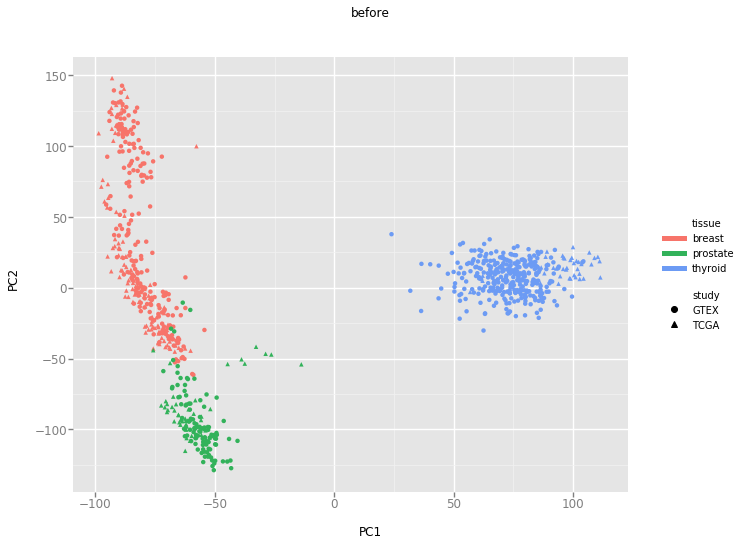

<ggplot: (8750671072211)>


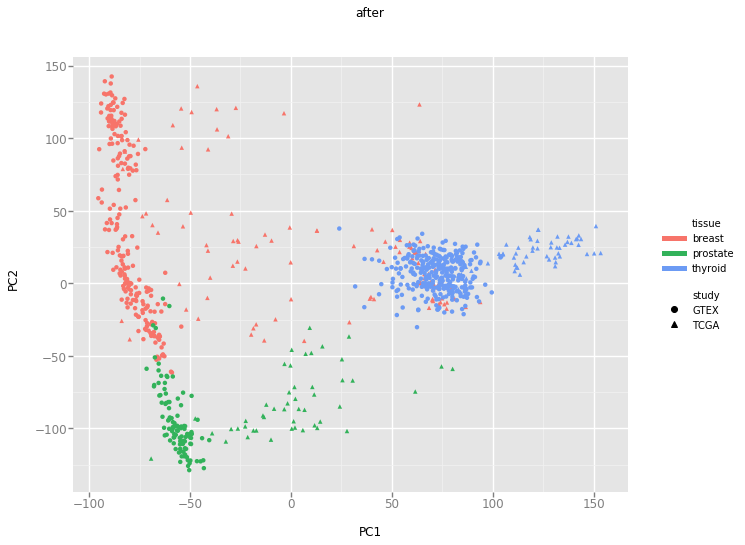

<ggplot: (-9223363286183833554)>


In [25]:
scatter_plot(rnaNet.source_pca_df, rnaNet.target_pca_df, title="before")
scatter_plot(rnaNet.calibrated_source_pca_df, rnaNet.target_pca_df, title="after")

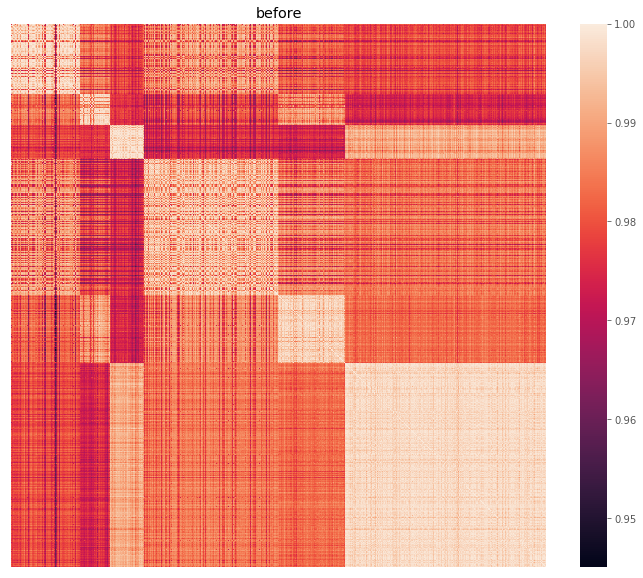

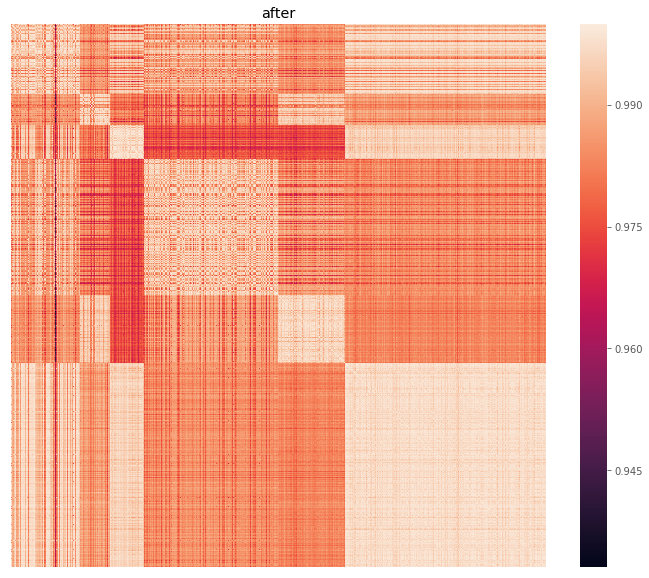

In [26]:
heatmap(rnaNet.source_df, rnaNet.target_df, title="before")
heatmap(rnaNet.calibrated_source_df, rnaNet.target_df, title="after")

In [27]:
import CostFunctions as cf
from keras import backend as K

source = rnaNet.source.astype('float32')
target = rnaNet.target.astype('float32')
calibrated_source = rnaNet.calibrated_source.astype('float32')

mmd = cf.MMD(source, target, MMDTargetSampleSize=target.shape[0], n_neighbors=10)
mmd_before = K.eval(mmd.cost(source, target))
mmd_after = K.eval(mmd.cost(calibrated_source, target))

print("MMD before: %0.10f" % mmd_before)
print("MMD after: %0.10f" % mmd_after)

setting scales using KNN
[21.570804289308867, 43.141608578617735, 86.28321715723547]
setting all scale weights to 1
MMD before: 0.9883776307
MMD after: 0.5330901146


In [ ]:
save_file = 'calibrated-unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
save_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + save_file)

rnaNet.save_calibrated(path=save_path)